## Dependencies

In [95]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

## Setup and Run Request
We are going to use NOAA Climate Data. We examine the cities of Monroe, WA and Stehekin, WA. To compare between years, we examine both the 2024 and 2025 data. Then, we plot the averages of each month. 

## Stehekin NOAA data

In [150]:
#Define the API URL and token header
headers = {'token' : 'TvAdxJblLeoezyJUbgSJRikNMntqSusm'}
url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USC00458059&&units=metric&datatype=PRCP&limit=1000&startdate=2025-12-01&enddate=2025-12-31'
# Download the json data
response = requests.get(url, headers=headers)
response.raise_for_status()  # Raise an error if the request failed
StehekinWeatherData = response.json() #get json file

url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USC00458059&&units=metric&datatype=PRCP&limit=1000&startdate=2024-12-01&enddate=2024-12-31'
# Download the json data
response = requests.get(url, headers=headers)
response.raise_for_status()  # Raise an error if the request failed
StehekinWeatherData2024 = response.json() #get json file

In [ ]:
# Check data imported correctly
StehekinWeatherData

{'metadata': {'resultset': {'offset': 1, 'count': 167, 'limit': 1000}},
 'results': [{'date': '2025-12-01T00:00:00',
   'datatype': 'PRCP',
   'station': 'GHCND:USC00458059',
   'attributes': ',,H,0800',
   'value': 0.0},
  {'date': '2025-12-01T00:00:00',
   'datatype': 'SNOW',
   'station': 'GHCND:USC00458059',
   'attributes': ',,H,',
   'value': 0.0},
  {'date': '2025-12-01T00:00:00',
   'datatype': 'SNWD',
   'station': 'GHCND:USC00458059',
   'attributes': ',,H,0800',
   'value': 0.0},
  {'date': '2025-12-01T00:00:00',
   'datatype': 'TMAX',
   'station': 'GHCND:USC00458059',
   'attributes': ',,H,0800',
   'value': 1.1},
  {'date': '2025-12-01T00:00:00',
   'datatype': 'TMIN',
   'station': 'GHCND:USC00458059',
   'attributes': ',,H,0800',
   'value': -2.8},
  {'date': '2025-12-01T00:00:00',
   'datatype': 'TOBS',
   'station': 'GHCND:USC00458059',
   'attributes': ',,H,0800',
   'value': 0.6},
  {'date': '2025-12-02T00:00:00',
   'datatype': 'PRCP',
   'station': 'GHCND:USC00458

In [151]:
# Convert json to pd dataframe
SteDf = pd.DataFrame(StehekinWeatherData["results"])

# Collect only precipitation data
StePrcpDf = SteDf[SteDf["datatype"]=="PRCP"] 

# Convert dates to nice format
StePrcpDf["date"] = pd.to_datetime(StePrcpDf["date"])

#Check dataframe for correctness
StePrcpDf

Ste24Df = pd.DataFrame(StehekinWeatherData2024["results"])
Ste24PrcpDf = Ste24Df[Ste24Df["datatype"] == "PRCP"]
Ste24PrcpDf["date"] = pd.to_datetime(Ste24PrcpDf["date"])


/tmp/ipykernel_70/2593724708.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StePrcpDf["date"] = pd.to_datetime(StePrcpDf["date"])
/tmp/ipykernel_70/2593724708.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ste24PrcpDf["date"] = pd.to_datetime(Ste24PrcpDf["date"])


## Examine and Visualize Data 

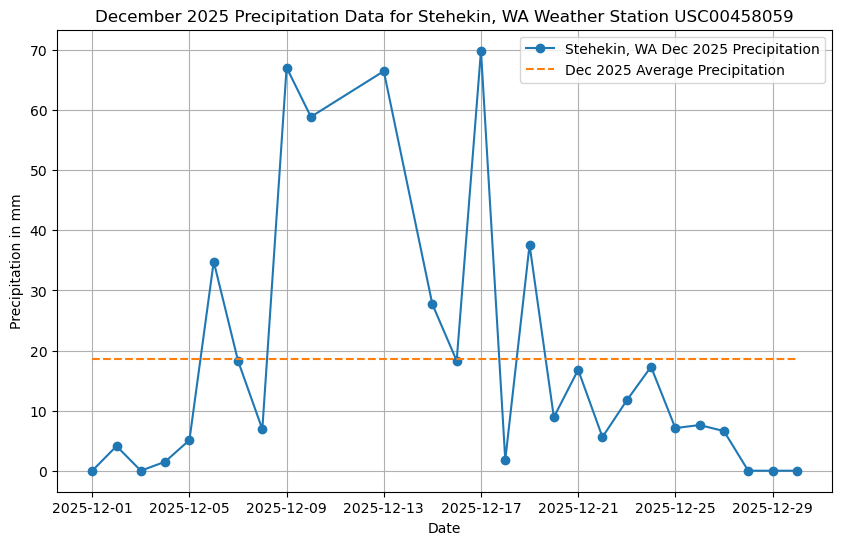

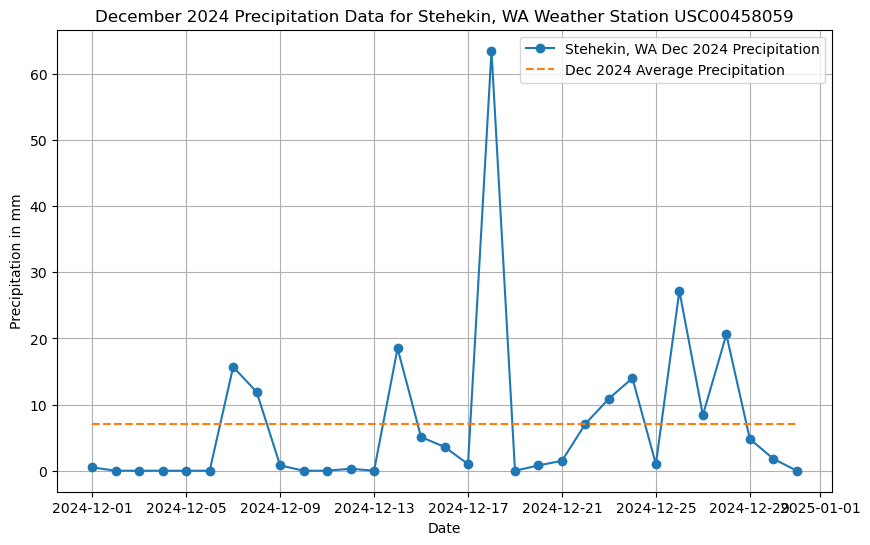

In [163]:
import numpy as np
plt.figure(figsize = (10,6))
#We convert 10ths of mm to mm
plt.plot(StePrcpDf['date'], StePrcpDf['value'], 'o', linestyle='-', label = "Stehekin, WA Dec 2025 Precipitation")
plt.plot(StePrcpDf['date'], np.ones((27,1))*StePrcpDf['value'].mean(), linestyle='--', label = "Dec 2025 Average Precipitation")
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Precipitation in mm")
plt.title("December 2025 Precipitation Data for Stehekin, WA Weather Station USC00458059")
plt.show()

plt.figure(figsize = (10,6))
#We convert 10ths of mm to mm
plt.plot(Ste24PrcpDf['date'], Ste24PrcpDf['value'], 'o', linestyle='-', label = "Stehekin, WA Dec 2024 Precipitation")
plt.plot(Ste24PrcpDf['date'], np.ones((31,1))*Ste24PrcpDf['value'].mean(), linestyle='--', label = "Dec 2024 Average Precipitation")
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Precipitation in mm")
plt.title("December 2024 Precipitation Data for Stehekin, WA Weather Station USC00458059")
plt.show()

## Monroe, WA Precipitation Data

In [ ]:
#Define the API URL and token header
headers = {'token' : 'TvAdxJblLeoezyJUbgSJRikNMntqSusm'}
url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USC00455525&&units=metric&datatype=PRCP&limit=1000&startdate=2025-12-01&enddate=2025-12-31'
# Download the json data
response = requests.get(url, headers=headers)
response.raise_for_status()  # Raise an error if the request failed
MonroeWeatherData2025 = response.json() #get json file

url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USC00455525&&units=metric&datatype=PRCP&limit=1000&startdate=2024-12-01&enddate=2024-12-31'
# Download the json data
response = requests.get(url, headers=headers)
response.raise_for_status()  # Raise an error if the request failed

MonroeWeatherData2024 = response.json() #get json file
# Check data imported correctly
MonroeWeatherData2024

{'metadata': {'resultset': {'offset': 1, 'count': 194, 'limit': 1000}},
 'results': [{'date': '2024-12-01T00:00:00',
   'datatype': 'PRCP',
   'station': 'GHCND:USC00455525',
   'attributes': ',,7,2000',
   'value': 0.0},
  {'date': '2024-12-01T00:00:00',
   'datatype': 'SNOW',
   'station': 'GHCND:USC00455525',
   'attributes': ',,7,',
   'value': 0.0},
  {'date': '2024-12-01T00:00:00',
   'datatype': 'SNWD',
   'station': 'GHCND:USC00455525',
   'attributes': ',,7,2000',
   'value': 0.0},
  {'date': '2024-12-01T00:00:00',
   'datatype': 'TMAX',
   'station': 'GHCND:USC00455525',
   'attributes': ',,7,2000',
   'value': 5.0},
  {'date': '2024-12-01T00:00:00',
   'datatype': 'TMIN',
   'station': 'GHCND:USC00455525',
   'attributes': ',,7,2000',
   'value': -0.6},
  {'date': '2024-12-01T00:00:00',
   'datatype': 'TOBS',
   'station': 'GHCND:USC00455525',
   'attributes': ',,7,2000',
   'value': 1.7},
  {'date': '2024-12-01T00:00:00',
   'datatype': 'WT01',
   'station': 'GHCND:USC00455

In [ ]:
# Convert json to pd dataframe
Mon25Df = pd.DataFrame(MonroeWeatherData2025["results"])

# Collect only precipitation data
Mon25PrcpDf = Mon25Df[Mon25Df["datatype"]=="PRCP"] 

# Convert dates to nice format
Mon25PrcpDf["date"] = pd.to_datetime(Mon25PrcpDf["date"])

# Convert json to pd dataframe
Mon24Df = pd.DataFrame(MonroeWeatherData2024["results"])

# Collect only precipitation data
Mon24PrcpDf = Mon24Df[Mon24Df["datatype"]=="PRCP"] 

# Convert dates to nice format
Mon24PrcpDf["date"] = pd.to_datetime(Mon24PrcpDf["date"])


/tmp/ipykernel_70/2533695144.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mon25PrcpDf["date"] = pd.to_datetime(Mon25PrcpDf["date"])
/tmp/ipykernel_70/2533695144.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mon24PrcpDf["date"] = pd.to_datetime(Mon24PrcpDf["date"])


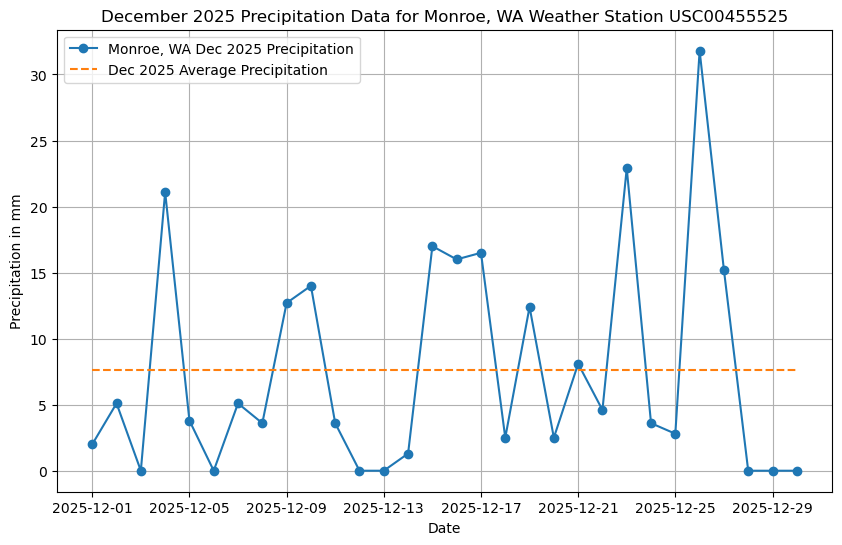

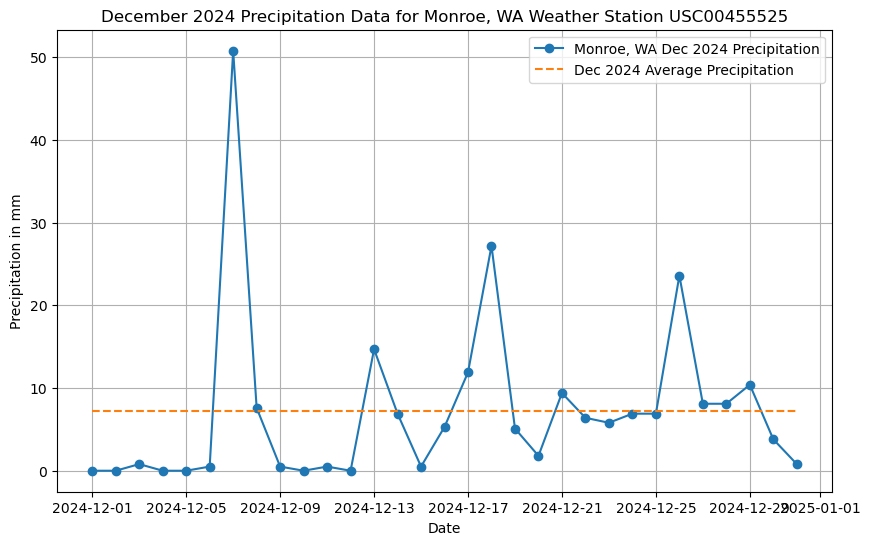

In [160]:
import numpy as np

plt.figure(figsize = (10,6))
plt.plot(Mon25PrcpDf['date'], Mon25PrcpDf['value'], 'o', linestyle='-', label = "Monroe, WA Dec 2025 Precipitation")
plt.plot(Mon25PrcpDf['date'], np.ones((30,1))*Mon25PrcpDf['value'].mean(), linestyle='--', label = "Dec 2025 Average Precipitation")
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Precipitation in mm")
plt.title("December 2025 Precipitation Data for Monroe, WA Weather Station USC00455525")
plt.show()

plt.figure(figsize = (10,6))
plt.plot(Mon24PrcpDf['date'], Mon24PrcpDf['value'],'o', linestyle='-', label = "Monroe, WA Dec 2024 Precipitation")
plt.plot(Mon24PrcpDf['date'], np.ones((31,1))*Mon24PrcpDf['value'].mean(), linestyle='--', label = "Dec 2024 Average Precipitation")
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Precipitation in mm")
plt.title("December 2024 Precipitation Data for Monroe, WA Weather Station USC00455525")
plt.show()

